In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# import some common libraries
import csv
import numpy as np
import os, glob, pickle
import matplotlib.pyplot as plt

In [20]:
# load all the pickle files(for each class) into a list
file_dir = '/gdrive/My Drive/auto'
metricFiles = sorted(glob.glob(os.path.join(file_dir, '*.pkl')))
metric_ls = []

# open each pickle file that stores metric results of one class
for file_name in metricFiles:
    open_file = open(file_name, "rb")
    metric = pickle.load(open_file) # load metrics as numpy
    metric_ls.append(metric) # append it to a list to use it for later plotting

    # save list as a csv file to easily move it to excel sheet
    open_file.close()
    with open("{}.csv".format(file_name), "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(metric)


n_epochs = int(metricsFiles[0].split('_')[1][-3:]) # extract number of epochs in the metric file
epochs = np.arange(1, n_epochs+1)
titles = ['instance-level-blind-degree', 'image-level-blind-degree']
x_axes = ['epoch', 'perturbation-norm']
classes = ['car', 'person', 'stop sign', 'traffic light', 'truck']

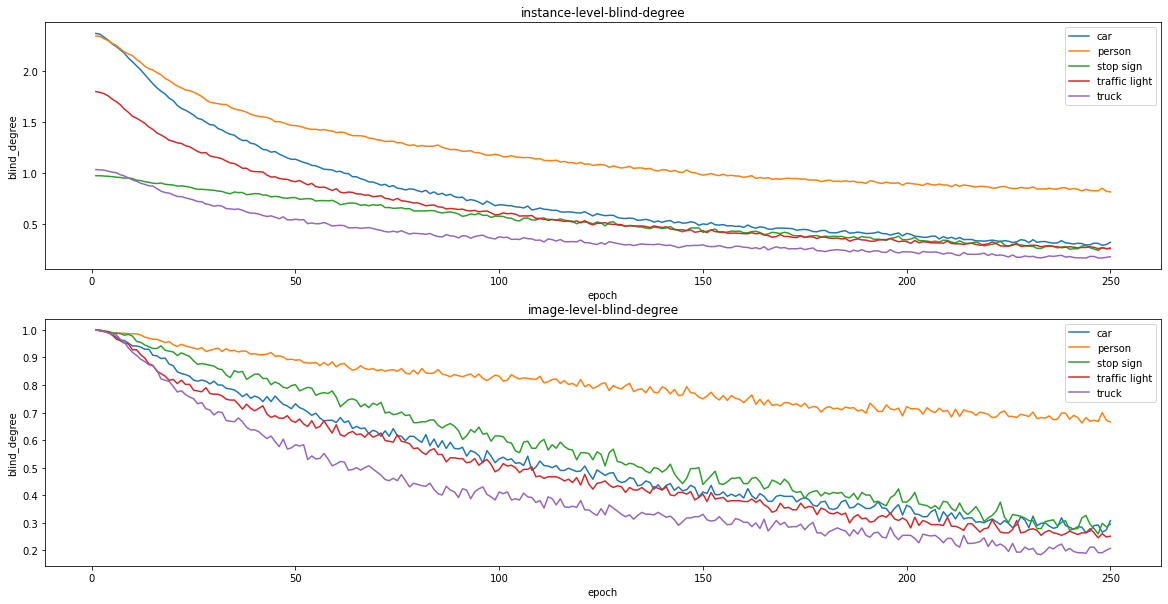

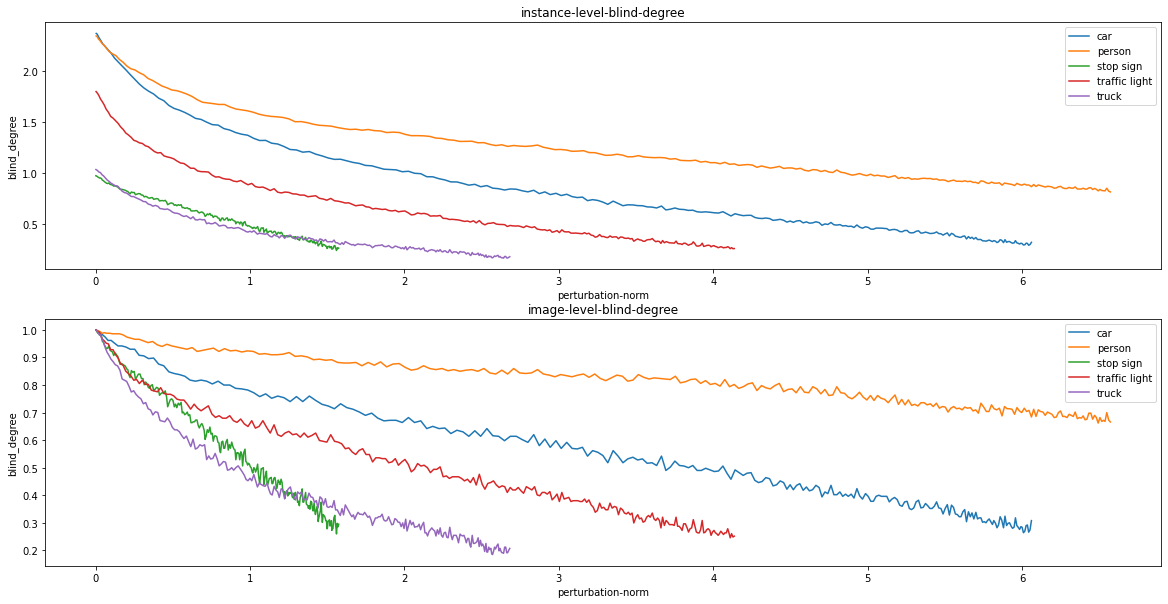

In [21]:
# vs. epoch or perturbation norm
for x_axis in x_axes:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

    # for each subplot (img-level, inst_level)
    for j in range(2):
        
        # for each class
        for idx, metric in enumerate(metric_ls):
            if x_axis == 'epoch':
                axes[j].plot(epochs, metric[:, 2+j], label=classes[idx])
            else:
                axes[j].plot(metric[:,1], metric[:,2+j], label=classes[idx])

            axes[j].set_title(titles[j])
            axes[j].set_xlabel(x_axis, fontsize=10)
            axes[j].set_ylabel('blind_degree', fontsize=10)
            axes[j].legend()
    fig.show()